## Factor de Inflación de la Varianza en datos de entrenamiento

Para reducir las dimensiones del conjunto de datos usaremos como criterio el factor de inflación de la varianza. Aquella variable con $VIF>3$ será descartada, ya que ese valor indica que su información ya la da(n) otro(s) predictor(es).

In [2]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [11]:
library(dplyr)
library("car") # VIF Library, may not work on Mac

In [12]:
dat <- read.csv("estudiantes.csv")
names(dat)

[1] "matricula"              "carrera"                "periodo"               
 [4] "numRepPrev"             "año"                    "semestre"              
 [7] "recursada"              "cantidad_asig"          "tasa_rep_carga"        
[10] "tasa_rep_asig"          "quintil_asig"           "asignatura"            
[13] "ceneval_global"         "ceneval_analitico"      "ceneval_matematico"    
[16] "ceneval_lengua"         "ceneval_esp"            "prom_per_prev"         
[19] "tasa_rep_doc_asig"      "tasa_rep_doc"           "generacion"            
[22] "tasa_aprob_per_prev"    "tasa_aprob_gral_prev"   "asigMuchas"            
[25] "cuartil_repEst"         "asigRep_totalAsig"      "año_encurso"           
[28] "complejidad_carga4"     "complejidad_carga"      "complejidad_carga5"    
[31] "semestre_Otoño"         "carga_aprobada"         "recursando"            
[34] "total_recursando"       "practicante"            "situacion"             
[37] "situacion_Condicionado" "situacion_Irregular"    "situacion_Regular"

In [13]:
dat <- subset(dat, dat$año != 2020 & dat$año != 2021 & dat$año != 2022)

In [14]:
dat_model <- dat %>% select(-matricula, -periodo, -carrera, -situacion, -asignatura,quintil_asig,
                            -año, -generacion, -semestre, -complejidad_carga4, -cuartil_repEst, -practicante)

In [15]:
length(names(dat_model))
names(dat_model)

[1] 28

[1] "numRepPrev"             "recursada"              "cantidad_asig"         
 [4] "tasa_rep_carga"         "tasa_rep_asig"          "quintil_asig"          
 [7] "ceneval_global"         "ceneval_analitico"      "ceneval_matematico"    
[10] "ceneval_lengua"         "ceneval_esp"            "prom_per_prev"         
[13] "tasa_rep_doc_asig"      "tasa_rep_doc"           "tasa_aprob_per_prev"   
[16] "tasa_aprob_gral_prev"   "asigMuchas"             "asigRep_totalAsig"     
[19] "año_encurso"            "complejidad_carga"      "complejidad_carga5"    
[22] "semestre_Otoño"         "carga_aprobada"         "recursando"            
[25] "total_recursando"       "situacion_Condicionado" "situacion_Irregular"   
[28] "situacion_Regular"

In [16]:
nrow(dat_model)

[1] 1295

In [17]:
length(names(dat_model))

[1] 28

In [18]:
# Build Logit model to test multicolinearity:
logitReg<- glm(carga_aprobada ~ ., data=dat_model, family=binomial(link="logit"))
summary(logitReg)


Call:
glm(formula = carga_aprobada ~ ., family = binomial(link = "logit"), 
    data = dat_model)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6955  -0.7458  -0.4200   0.7402   2.6757  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -7.472457   1.827001  -4.090 4.31e-05 ***
numRepPrev              0.010576   0.165135   0.064 0.948937    
recursada               0.143065   0.295178   0.485 0.627909    
cantidad_asig          -0.307387   0.098113  -3.133 0.001730 ** 
tasa_rep_carga         -0.084175   0.016625  -5.063 4.12e-07 ***
tasa_rep_asig           0.038407   0.011142   3.447 0.000567 ***
quintil_asig           -0.297727   0.114308  -2.605 0.009198 ** 
ceneval_global          0.550578   0.354867   1.552 0.120781    
ceneval_analitico      -0.135368   0.088689  -1.526 0.126931    
ceneval_matematico     -0.133832   0.088660  -1.509 0.131173    
ceneval_lengua         -0.136934   0.088763  -1.543 0.122

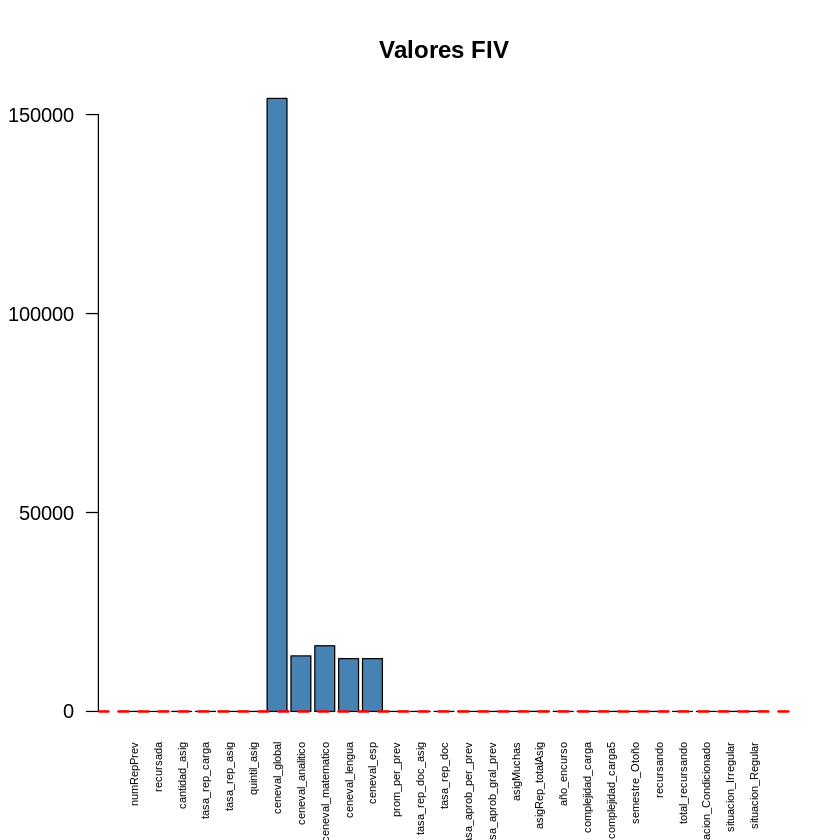

In [20]:
# Perform VIF Analysis, to exclude variables with high Collinearity:
vif_values <- vif(logitReg)

# create horizontal bar chart to display each VIF value
barplot(vif_values, main = "Valores FIV", horiz = F,
        col = "steelblue", cex.names = 0.55, las = 2)
# add vertical line at 5
abline(h = 3, lwd = 2, lty = 2, col='red')

In [21]:
tail(sort(vif_values))

situacion_Regular     ceneval_lengua        ceneval_esp  ceneval_analitico 
          25.40614        13276.36498        13279.13091        13971.93657 
ceneval_matematico     ceneval_global 
       16514.32012       154065.85166

* Se retira *ceneval_global* por ser la variable con mayor FIV


Call:
glm(formula = carga_aprobada ~ ., family = binomial(link = "logit"), 
    data = dat_model2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7014  -0.7508  -0.4243   0.7412   2.6740  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -7.1431052  1.8126817  -3.941 8.13e-05 ***
numRepPrev             -0.0048660  0.1642682  -0.030 0.976368    
recursada               0.1537854  0.2952769   0.521 0.602494    
cantidad_asig          -0.2972165  0.0978025  -3.039 0.002374 ** 
tasa_rep_carga         -0.0864506  0.0165413  -5.226 1.73e-07 ***
tasa_rep_asig           0.0393772  0.0110951   3.549 0.000387 ***
quintil_asig           -0.3042059  0.1139719  -2.669 0.007605 ** 
ceneval_analitico       0.0022111  0.0011149   1.983 0.047334 *  
ceneval_matematico      0.0037015  0.0009700   3.816 0.000136 ***
ceneval_lengua          0.0007773  0.0010563   0.736 0.461775    
ceneval_esp             0.0001010  0.0010314 

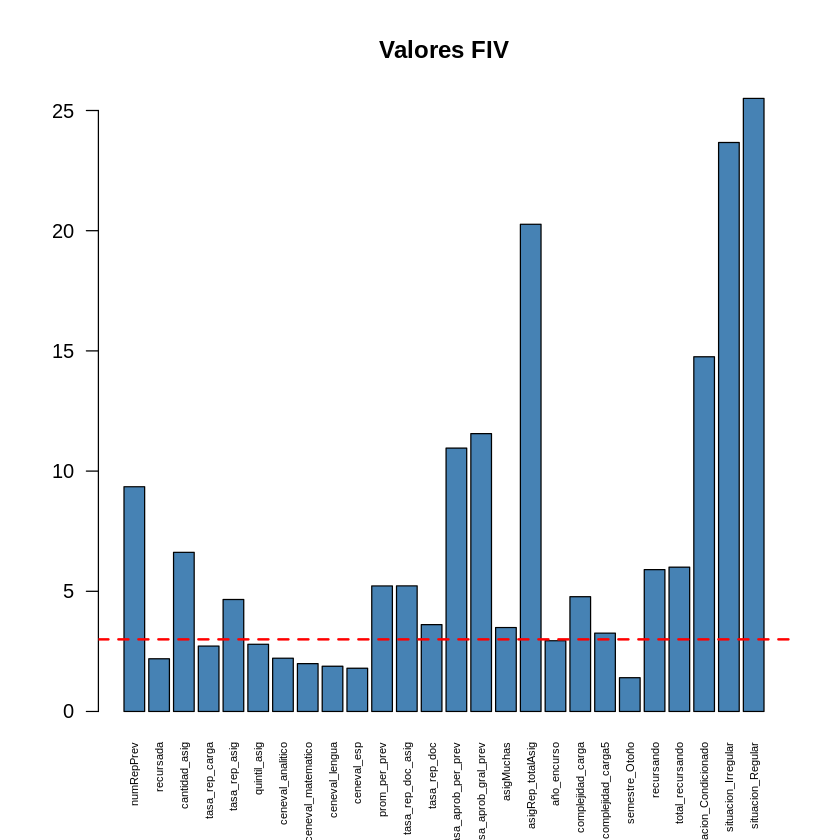

In [24]:
dat_model2 <- dat_model %>% select(-ceneval_global)

logitReg2 <- glm(carga_aprobada ~ ., data=dat_model2, family=binomial(link="logit"))
summary(logitReg2)

vif_values2 <- vif(logitReg2)

barplot(vif_values2, main = "Valores FIV", horiz = F,
        col = "steelblue", cex.names = 0.55, las = 2)
abline(h = 3, lwd = 2, lty = 2, col='red')

In [25]:
tail(sort(vif_values2))

tasa_aprob_per_prev   tasa_aprob_gral_prev situacion_Condicionado 
              10.95625               11.55821               14.75508 
     asigRep_totalAsig    situacion_Irregular      situacion_Regular 
              20.26730               23.66881               25.50341

* Se retira *situacion_Regular* por ser la variable con mayor FIV


Call:
glm(formula = carga_aprobada ~ ., family = binomial(link = "logit"), 
    data = dat_model3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6620  -0.7475  -0.4201   0.7535   2.6459  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -5.836e+00  1.709e+00  -3.414 0.000640 ***
numRepPrev             -5.208e-02  1.617e-01  -0.322 0.747363    
recursada               1.659e-01  2.957e-01   0.561 0.574667    
cantidad_asig          -2.839e-01  9.684e-02  -2.932 0.003372 ** 
tasa_rep_carga         -8.393e-02  1.635e-02  -5.132 2.86e-07 ***
tasa_rep_asig           3.940e-02  1.107e-02   3.557 0.000375 ***
quintil_asig           -2.971e-01  1.130e-01  -2.628 0.008576 ** 
ceneval_analitico       2.413e-03  1.108e-03   2.178 0.029370 *  
ceneval_matematico      3.649e-03  9.650e-04   3.782 0.000156 ***
ceneval_lengua          8.197e-04  1.053e-03   0.778 0.436291    
ceneval_esp            -4.679e-05  1.027e-03 

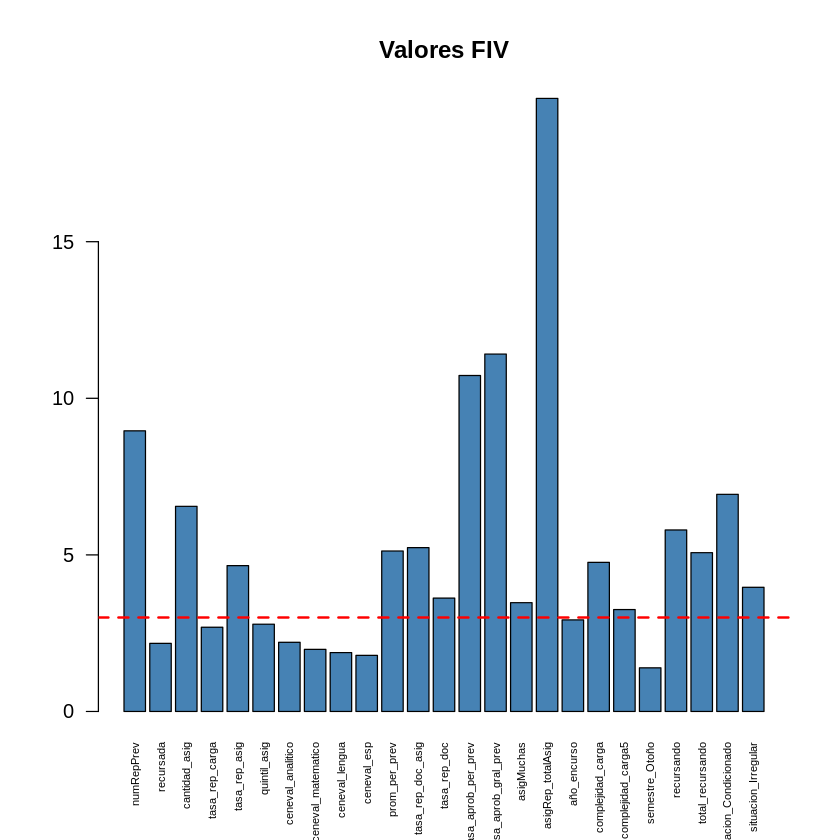

In [26]:
dat_model3 <- dat_model2 %>% select(-situacion_Regular)
logitReg3<- glm(carga_aprobada ~ ., data=dat_model3, family=binomial(link="logit"))
summary(logitReg3)

vif_values3 <- vif(logitReg3)

barplot(vif_values3, main = "Valores FIV", horiz = F,
        col = "steelblue", cex.names = 0.55, las = 2)
abline(h = 3, lwd = 2, lty = 2, col='red')

In [27]:
tail(sort(vif_values3))

cantidad_asig situacion_Condicionado             numRepPrev 
              6.549914               6.933181               8.960297 
   tasa_aprob_per_prev   tasa_aprob_gral_prev      asigRep_totalAsig 
             10.726908              11.411813              19.574969

* Se retira *asigRep_totalAsig* por ser la variable con mayor FIV


Call:
glm(formula = carga_aprobada ~ ., family = binomial(link = "logit"), 
    data = dat_model4)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6618  -0.7483  -0.4212   0.7536   2.6430  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -5.737e+00  1.611e+00  -3.562 0.000369 ***
numRepPrev             -3.430e-02  1.254e-01  -0.274 0.784444    
recursada               1.670e-01  2.957e-01   0.565 0.572351    
cantidad_asig          -2.841e-01  9.684e-02  -2.934 0.003346 ** 
tasa_rep_carga         -8.404e-02  1.635e-02  -5.140 2.74e-07 ***
tasa_rep_asig           3.937e-02  1.107e-02   3.555 0.000378 ***
quintil_asig           -2.971e-01  1.131e-01  -2.628 0.008592 ** 
ceneval_analitico       2.420e-03  1.107e-03   2.187 0.028759 *  
ceneval_matematico      3.638e-03  9.625e-04   3.779 0.000157 ***
ceneval_lengua          8.137e-04  1.052e-03   0.773 0.439345    
ceneval_esp            -4.564e-05  1.026e-03 

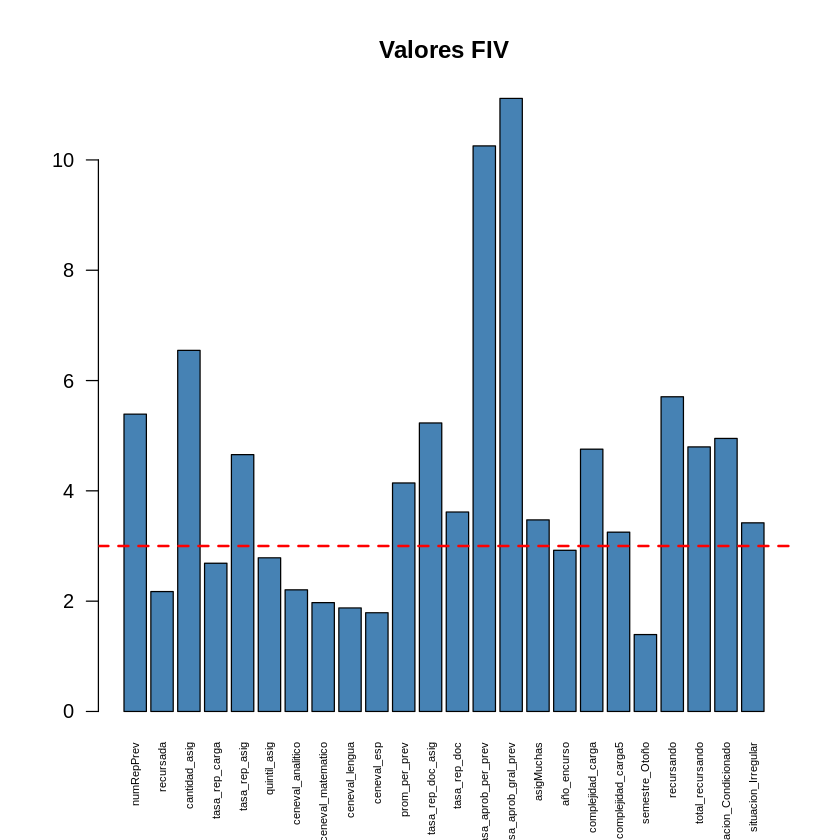

In [28]:
dat_model4 <- dat_model3 %>% select(-asigRep_totalAsig)
logitReg4<- glm(carga_aprobada ~ ., data=dat_model4, family=binomial(link="logit"))
summary(logitReg4)

vif_values4 <- vif(logitReg4)

barplot(vif_values4, main = "Valores FIV", horiz = F,
        col = "steelblue", cex.names = 0.55, las = 2)
abline(h = 3, lwd = 2, lty = 2, col='red')

In [29]:
tail(sort(vif_values4))

tasa_rep_doc_asig           numRepPrev           recursando 
            5.231173             5.391141             5.706206 
       cantidad_asig  tasa_aprob_per_prev tasa_aprob_gral_prev 
            6.546877            10.253927            11.115573

* Se retira *tasa_aprob_gral_prev* por ser la variable con mayor FIV


Call:
glm(formula = carga_aprobada ~ ., family = binomial(link = "logit"), 
    data = dat_model5)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6982  -0.7518  -0.4159   0.7584   2.6688  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -5.973e+00  1.601e+00  -3.730 0.000191 ***
numRepPrev              1.296e-03  1.227e-01   0.011 0.991573    
recursada               1.667e-01  2.962e-01   0.563 0.573635    
cantidad_asig          -2.767e-01  9.650e-02  -2.867 0.004145 ** 
tasa_rep_carga         -8.413e-02  1.631e-02  -5.158 2.50e-07 ***
tasa_rep_asig           3.983e-02  1.107e-02   3.599 0.000319 ***
quintil_asig           -3.060e-01  1.128e-01  -2.712 0.006694 ** 
ceneval_analitico       2.478e-03  1.106e-03   2.241 0.025049 *  
ceneval_matematico      3.805e-03  9.541e-04   3.988 6.65e-05 ***
ceneval_lengua          8.646e-04  1.052e-03   0.822 0.411064    
ceneval_esp            -7.816e-05  1.025e-03 

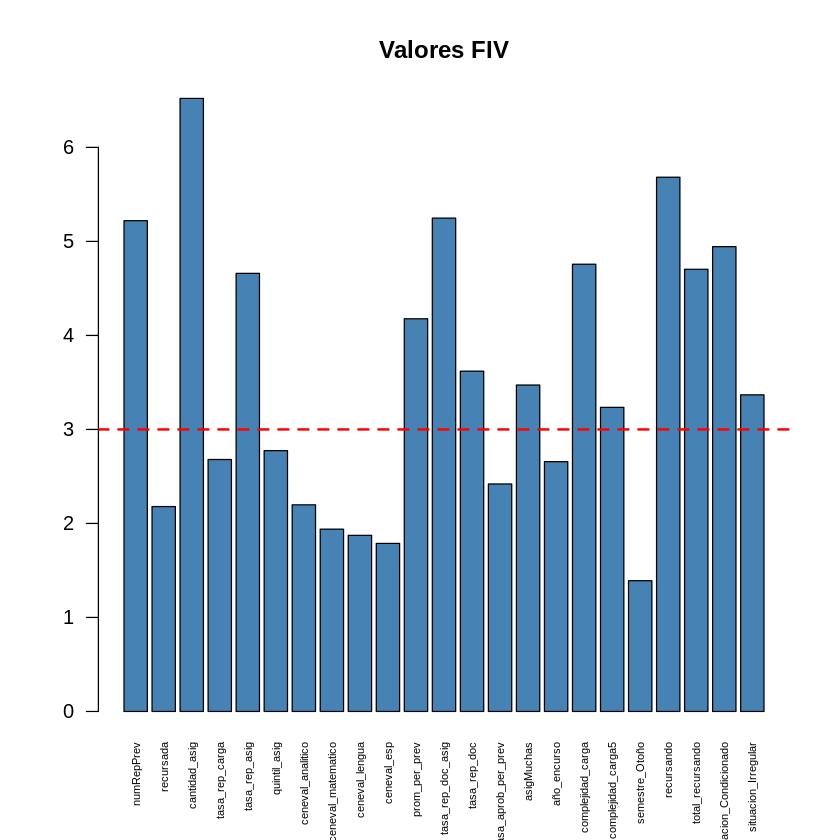

In [30]:
dat_model5 <- dat_model4 %>% select(-tasa_aprob_gral_prev)
logitReg5 <- glm(carga_aprobada ~ ., data=dat_model5, family=binomial(link="logit"))
summary(logitReg5)

vif_values5 <- vif(logitReg5)

barplot(vif_values5, main = "Valores FIV", horiz = F,
        col = "steelblue", cex.names = 0.55, las = 2)
abline(h = 3, lwd = 2, lty = 2, col='red')

In [31]:
tail(sort(vif_values5))

complejidad_carga situacion_Condicionado             numRepPrev 
              4.757018               4.944452               5.219842 
     tasa_rep_doc_asig             recursando          cantidad_asig 
              5.247964               5.682398               6.520955

* Se retira *cantidad_asig* por ser la variable con mayor FIV


Call:
glm(formula = carga_aprobada ~ ., family = binomial(link = "logit"), 
    data = dat_model6)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5720  -0.7577  -0.4206   0.7684   2.6862  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -6.0043551  1.5877161  -3.782 0.000156 ***
numRepPrev              0.0133145  0.1217076   0.109 0.912887    
recursada               0.1849267  0.2963168   0.624 0.532572    
tasa_rep_carga         -0.0746723  0.0158781  -4.703 2.57e-06 ***
tasa_rep_asig           0.0370825  0.0109748   3.379 0.000728 ***
quintil_asig           -0.2664664  0.1112301  -2.396 0.016592 *  
ceneval_analitico       0.0024134  0.0011017   2.191 0.028480 *  
ceneval_matematico      0.0036873  0.0009512   3.876 0.000106 ***
ceneval_lengua          0.0007897  0.0010460   0.755 0.450259    
ceneval_esp            -0.0001046  0.0010178  -0.103 0.918106    
prom_per_prev           0.3957984  0.1122661 

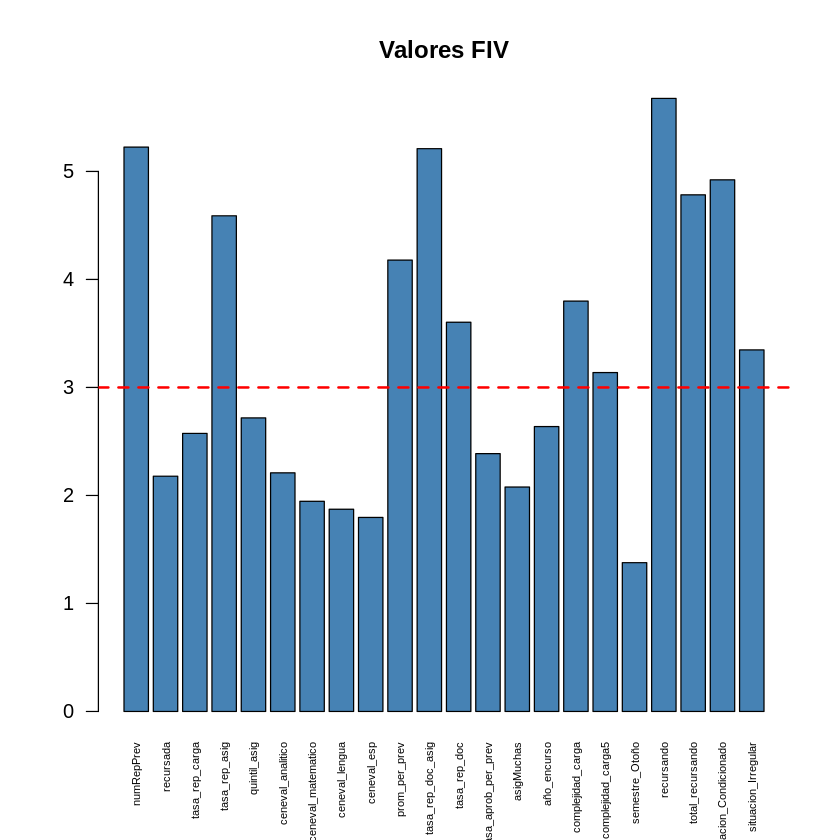

In [32]:
# -cantidad_asig
dat_model6 <- dat_model5 %>% select(-cantidad_asig)
logitReg6 <- glm(carga_aprobada ~ ., data=dat_model6, family=binomial(link="logit"))
summary(logitReg6)

vif_values6 <- vif(logitReg6)

barplot(vif_values6, main = "Valores FIV", horiz = F,
        col = "steelblue", cex.names = 0.55, las = 2)
abline(h = 3, lwd = 2, lty = 2, col='red')

In [33]:
tail(sort(vif_values6))

tasa_rep_asig       total_recursando situacion_Condicionado 
              4.589387               4.783265               4.922475 
     tasa_rep_doc_asig             numRepPrev             recursando 
              5.210993               5.225397               5.676359

* Se retira *recursando* por ser la variable con mayor FIV


Call:
glm(formula = carga_aprobada ~ ., family = binomial(link = "logit"), 
    data = dat_model7)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5555  -0.7588  -0.4258   0.7706   2.5919  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -6.048e+00  1.587e+00  -3.811 0.000138 ***
numRepPrev             -2.482e-03  1.218e-01  -0.020 0.983745    
recursada               1.974e-01  2.961e-01   0.667 0.505037    
tasa_rep_carga         -7.170e-02  1.575e-02  -4.552 5.32e-06 ***
tasa_rep_asig           3.712e-02  1.095e-02   3.391 0.000697 ***
quintil_asig           -2.649e-01  1.112e-01  -2.383 0.017172 *  
ceneval_analitico       2.388e-03  1.099e-03   2.174 0.029712 *  
ceneval_matematico      3.665e-03  9.490e-04   3.862 0.000113 ***
ceneval_lengua          7.466e-04  1.047e-03   0.713 0.475676    
ceneval_esp            -5.876e-05  1.017e-03  -0.058 0.953944    
prom_per_prev           4.030e-01  1.128e-01 

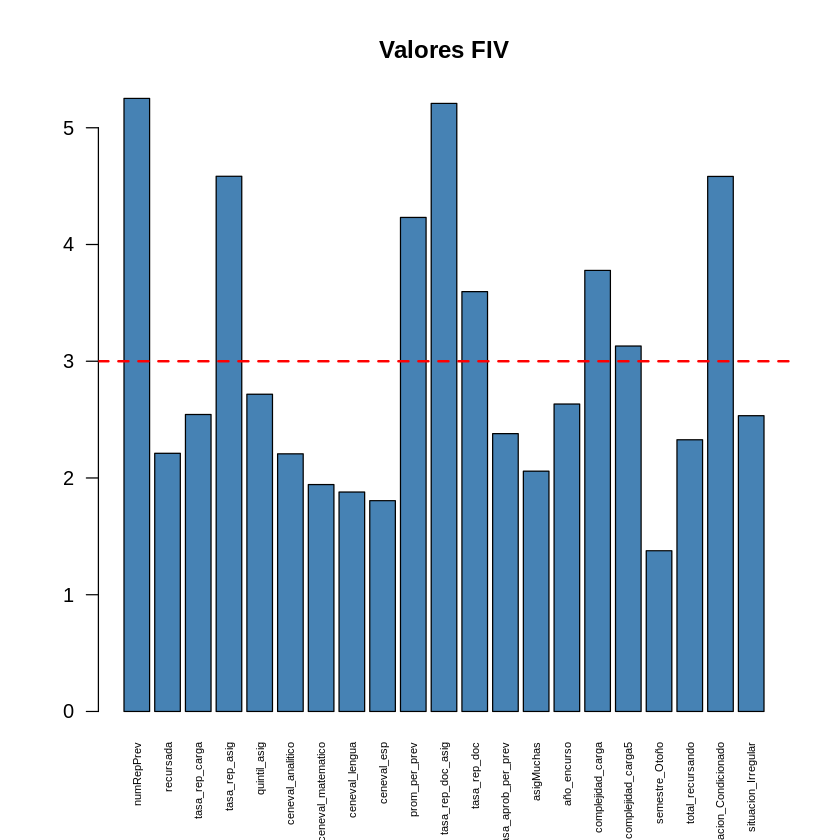

In [34]:
dat_model7 <- dat_model6 %>% select(-recursando)
logitReg7 <- glm(carga_aprobada ~ ., data=dat_model7, family=binomial(link="logit"))
summary(logitReg7)

vif_values7 <- vif(logitReg7)

barplot(vif_values7, main = "Valores FIV", horiz = F,
        col = "steelblue", cex.names = 0.55, las = 2)
abline(h = 3, lwd = 2, lty = 2, col='red')

In [35]:
tail(sort(vif_values7))

complejidad_carga          prom_per_prev situacion_Condicionado 
              3.778172               4.232024               4.582897 
         tasa_rep_asig      tasa_rep_doc_asig             numRepPrev 
              4.584443               5.208562               5.251438

* Se retira *numRepPrev* por ser la variable con mayor FIV


Call:
glm(formula = carga_aprobada ~ ., family = binomial(link = "logit"), 
    data = dat_model8)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5558  -0.7584  -0.4259   0.7705   2.5921  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -6.058e+00  1.497e+00  -4.047 5.19e-05 ***
recursada               1.976e-01  2.960e-01   0.668 0.504451    
tasa_rep_carga         -7.166e-02  1.563e-02  -4.585 4.55e-06 ***
tasa_rep_asig           3.712e-02  1.095e-02   3.391 0.000697 ***
quintil_asig           -2.649e-01  1.112e-01  -2.383 0.017163 *  
ceneval_analitico       2.388e-03  1.098e-03   2.175 0.029644 *  
ceneval_matematico      3.664e-03  9.488e-04   3.862 0.000112 ***
ceneval_lengua          7.453e-04  1.045e-03   0.713 0.475618    
ceneval_esp            -5.818e-05  1.017e-03  -0.057 0.954379    
prom_per_prev           4.042e-01  9.662e-02   4.183 2.87e-05 ***
tasa_rep_doc_asig      -3.465e-02  8.156e-03 

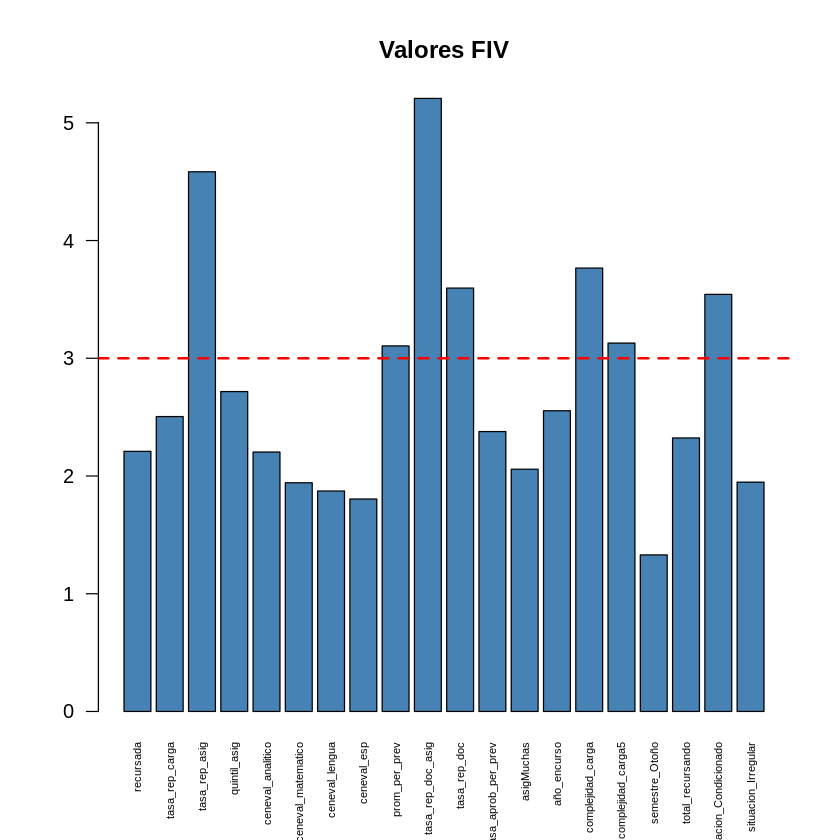

In [36]:
dat_model8 <- dat_model7 %>% select(-numRepPrev)
logitReg8 <- glm(carga_aprobada ~ ., data=dat_model8, family=binomial(link="logit"))
summary(logitReg8)

vif_values8 <- vif(logitReg8)

barplot(vif_values8, main = "Valores FIV", horiz = F,
        col = "steelblue", cex.names = 0.55, las = 2)
abline(h = 3, lwd = 2, lty = 2, col='red')

In [37]:
tail(sort(vif_values8))

complejidad_carga5 situacion_Condicionado           tasa_rep_doc 
              3.128698               3.542926               3.596274 
     complejidad_carga          tasa_rep_asig      tasa_rep_doc_asig 
              3.766209               4.583939               5.207313


Call:
glm(formula = carga_aprobada ~ ., family = binomial(link = "logit"), 
    data = dat_model9)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4736  -0.7670  -0.4453   0.7750   2.4832  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -5.819e+00  1.480e+00  -3.932 8.44e-05 ***
recursada               2.223e-01  2.926e-01   0.760 0.447294    
tasa_rep_carga         -7.304e-02  1.544e-02  -4.730 2.25e-06 ***
tasa_rep_asig           1.525e-02  9.645e-03   1.581 0.113977    
quintil_asig           -2.306e-01  1.097e-01  -2.102 0.035513 *  
ceneval_analitico       2.179e-03  1.089e-03   2.002 0.045309 *  
ceneval_matematico      3.858e-03  9.415e-04   4.098 4.17e-05 ***
ceneval_lengua          5.175e-04  1.038e-03   0.499 0.617957    
ceneval_esp            -9.198e-05  1.007e-03  -0.091 0.927212    
prom_per_prev           4.317e-01  9.590e-02   4.502 6.74e-06 ***
tasa_rep_doc           -1.555e-02  6.073e-03 

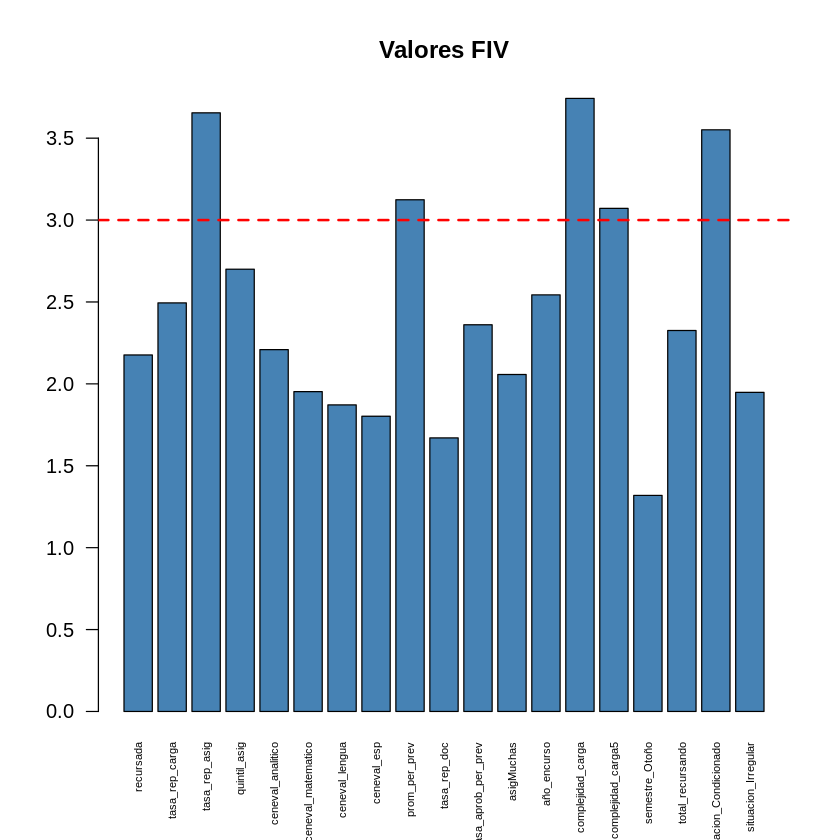

In [38]:
# -tasa_rep_doc_asig
dat_model9 <- dat_model8 %>% select(-tasa_rep_doc_asig)
logitReg9 <- glm(carga_aprobada ~ ., data=dat_model9, family=binomial(link="logit"))
summary(logitReg9)

vif_values9 <- vif(logitReg9)

barplot(vif_values9, main = "Valores FIV", horiz = F,
        col = "steelblue", cex.names = 0.55, las = 2)
abline(h = 3, lwd = 2, lty = 2, col='red')

In [39]:
tail(sort(vif_values9))

quintil_asig     complejidad_carga5          prom_per_prev 
              2.700002               3.071287               3.123927 
situacion_Condicionado          tasa_rep_asig      complejidad_carga 
              3.550983               3.654506               3.742708


Call:
glm(formula = carga_aprobada ~ ., family = binomial(link = "logit"), 
    data = dat_model10)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4679  -0.7645  -0.4536   0.7986   2.4798  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -6.968e+00  1.398e+00  -4.984 6.24e-07 ***
recursada               2.554e-01  2.917e-01   0.876 0.381192    
tasa_rep_carga         -7.484e-02  1.542e-02  -4.855 1.21e-06 ***
tasa_rep_asig           1.595e-02  9.595e-03   1.662 0.096465 .  
quintil_asig           -2.615e-01  1.085e-01  -2.409 0.015977 *  
ceneval_analitico       2.136e-03  1.085e-03   1.969 0.048978 *  
ceneval_matematico      3.824e-03  9.389e-04   4.073 4.64e-05 ***
ceneval_lengua          5.125e-04  1.033e-03   0.496 0.619814    
ceneval_esp            -5.065e-05  1.004e-03  -0.050 0.959780    
prom_per_prev           4.176e-01  9.529e-02   4.382 1.17e-05 ***
tasa_rep_doc           -1.509e-02  6.043e-03

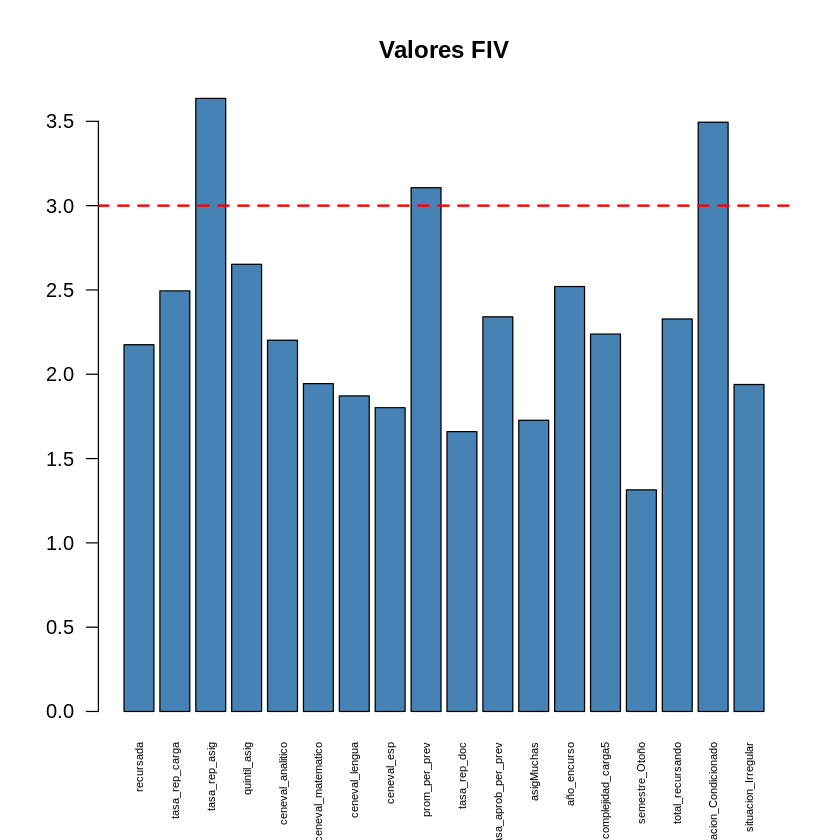

In [40]:
# -complejidad_carga
dat_model10 <- dat_model9 %>% select(-complejidad_carga)
logitReg10 <- glm(carga_aprobada ~ ., data=dat_model10, family=binomial(link="logit"))
summary(logitReg10)

vif_values10 <- vif(logitReg10)

barplot(vif_values10, main = "Valores FIV", horiz = F,
        col = "steelblue", cex.names = 0.55, las = 2)
abline(h = 3, lwd = 2, lty = 2, col='red')

In [41]:
tail(sort(vif_values10))

tasa_rep_carga            año_encurso           quintil_asig 
              2.494514               2.520202               2.652051 
         prom_per_prev situacion_Condicionado          tasa_rep_asig 
              3.106544               3.494540               3.635980


Call:
glm(formula = carga_aprobada ~ ., family = binomial(link = "logit"), 
    data = dat_model11)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4297  -0.7856  -0.4488   0.7903   2.4893  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -7.2716728  1.3863510  -5.245 1.56e-07 ***
recursada               0.3945467  0.2797957   1.410 0.158503    
tasa_rep_carga         -0.0687814  0.0149339  -4.606 4.11e-06 ***
quintil_asig           -0.1578123  0.0880296  -1.793 0.073018 .  
ceneval_analitico       0.0021538  0.0010845   1.986 0.047047 *  
ceneval_matematico      0.0038201  0.0009403   4.063 4.85e-05 ***
ceneval_lengua          0.0005813  0.0010296   0.565 0.572366    
ceneval_esp            -0.0001733  0.0010013  -0.173 0.862592    
prom_per_prev           0.4156237  0.0952932   4.362 1.29e-05 ***
tasa_rep_doc           -0.0106630  0.0054472  -1.958 0.050286 .  
tasa_aprob_per_prev     0.3347471  0.2449485

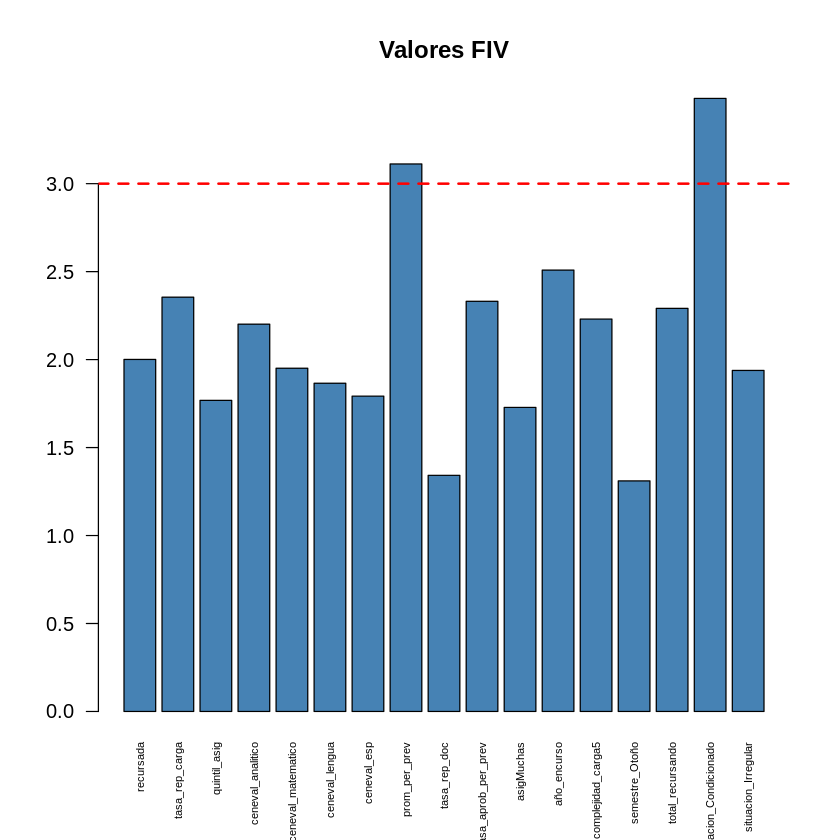

In [42]:
#-tasa_rep_asig
dat_model11 <- dat_model10 %>% select(-tasa_rep_asig)
logitReg11 <- glm(carga_aprobada ~ ., data=dat_model11, family=binomial(link="logit"))
summary(logitReg11)

vif_values11 <- vif(logitReg11)

barplot(vif_values11, main = "Valores FIV", horiz = F,
        col = "steelblue", cex.names = 0.55, las = 2)
abline(h = 3, lwd = 2, lty = 2, col='red')

In [43]:
tail(sort(vif_values11))

total_recursando    tasa_aprob_per_prev         tasa_rep_carga 
              2.291192               2.331305               2.354742 
           año_encurso          prom_per_prev situacion_Condicionado 
              2.508846               3.112075               3.484669


Call:
glm(formula = carga_aprobada ~ ., family = binomial(link = "logit"), 
    data = dat_model12)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4477  -0.7848  -0.4541   0.7944   2.4694  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -6.8298454  1.2353016  -5.529 3.22e-08 ***
recursada            0.4139763  0.2777938   1.490   0.1362    
tasa_rep_carga      -0.0681448  0.0149027  -4.573 4.82e-06 ***
quintil_asig        -0.1599627  0.0879924  -1.818   0.0691 .  
ceneval_analitico    0.0021635  0.0010843   1.995   0.0460 *  
ceneval_matematico   0.0037838  0.0009385   4.032 5.53e-05 ***
ceneval_lengua       0.0005903  0.0010291   0.574   0.5662    
ceneval_esp         -0.0001669  0.0010011  -0.167   0.8676    
prom_per_prev        0.3736445  0.0741608   5.038 4.70e-07 ***
tasa_rep_doc        -0.0107849  0.0054443  -1.981   0.0476 *  
tasa_aprob_per_prev  0.3315016  0.2450229   1.353   0.1761    
asigMuchas    

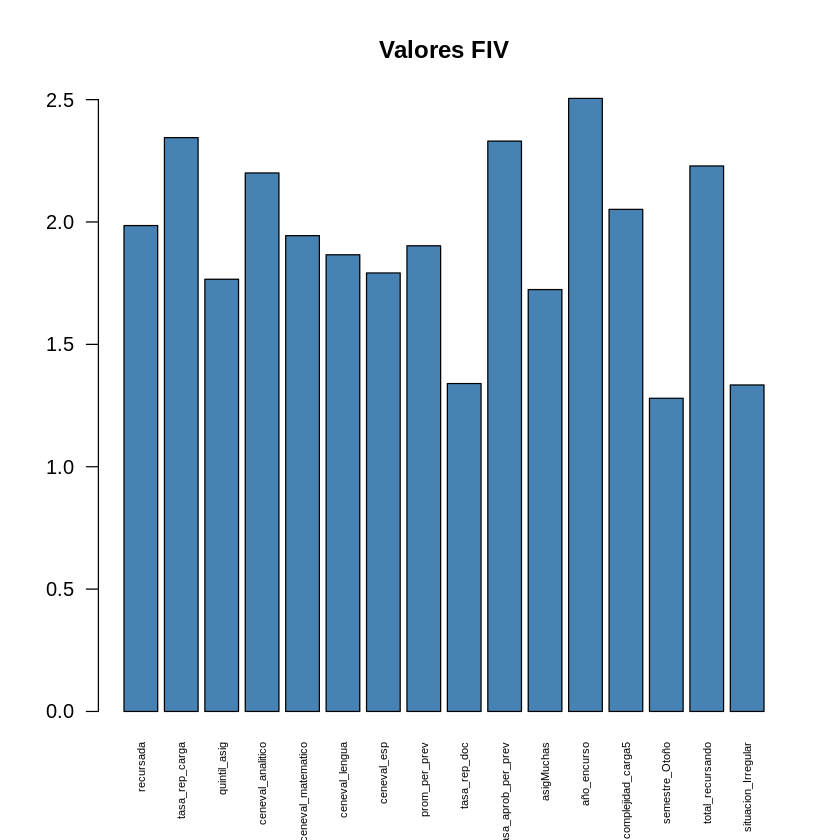

In [44]:
#-situacion_Condicionado
dat_model12 <- dat_model11 %>% select(-situacion_Condicionado)
logitReg12 <- glm(carga_aprobada ~ ., data=dat_model12, family=binomial(link="logit"))
summary(logitReg12)

vif_values12 <- vif(logitReg12)

barplot(vif_values12, main = "Valores FIV", horiz = F,
        col = "steelblue", cex.names = 0.55, las = 2)
abline(h = 3, lwd = 2, lty = 2, col='red')

In [45]:
tail(sort(vif_values12))

complejidad_carga5   ceneval_analitico    total_recursando tasa_aprob_per_prev 
           2.051535            2.200243            2.228819            2.330416 
     tasa_rep_carga         año_encurso 
           2.344734            2.504957

A continuación se enlistan los predictores que se usarán para la creación del modelo de regresión logística de la variable *carga_aprobada*:

In [46]:
length(names(dat_model12))
names(dat_model12)

[1] 17

[1] "recursada"           "tasa_rep_carga"      "quintil_asig"       
 [4] "ceneval_analitico"   "ceneval_matematico"  "ceneval_lengua"     
 [7] "ceneval_esp"         "prom_per_prev"       "tasa_rep_doc"       
[10] "tasa_aprob_per_prev" "asigMuchas"          "año_encurso"        
[13] "complejidad_carga5"  "semestre_Otoño"      "carga_aprobada"     
[16] "total_recursando"    "situacion_Irregular"

Guardamos los predictores en un csv para poder usarlos en el notebook *modelo*.

In [47]:
write.csv(dat_model12, "predictores_train_VIF.csv", row.names = FALSE)